In [45]:
#Install the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout


In [46]:
csv_file = 'HTZ.csv' #change this to an cvs incoming for R code

#Import it into the df
df = pd.read_csv(csv_file)


                 Date       Open       High        Low      Close  Adj Close  \
Date                                                                           
2021-07-01 2021-07-01  22.000000  35.000000  16.000000  26.990000  26.990000   
2021-07-02 2021-07-02  29.799999  29.799999  23.500000  23.959999  23.959999   
2021-07-06 2021-07-06  23.389999  23.750000  19.780001  21.750000  21.750000   
2021-07-07 2021-07-07  21.100000  22.700001  20.180000  21.450001  21.450001   
2021-07-08 2021-07-08  21.450001  21.450001  19.110001  19.230000  19.230000   

             Volume  
Date                 
2021-07-01  2339600  
2021-07-02  2002700  
2021-07-06  1570000  
2021-07-07   846900  
2021-07-08   765400  


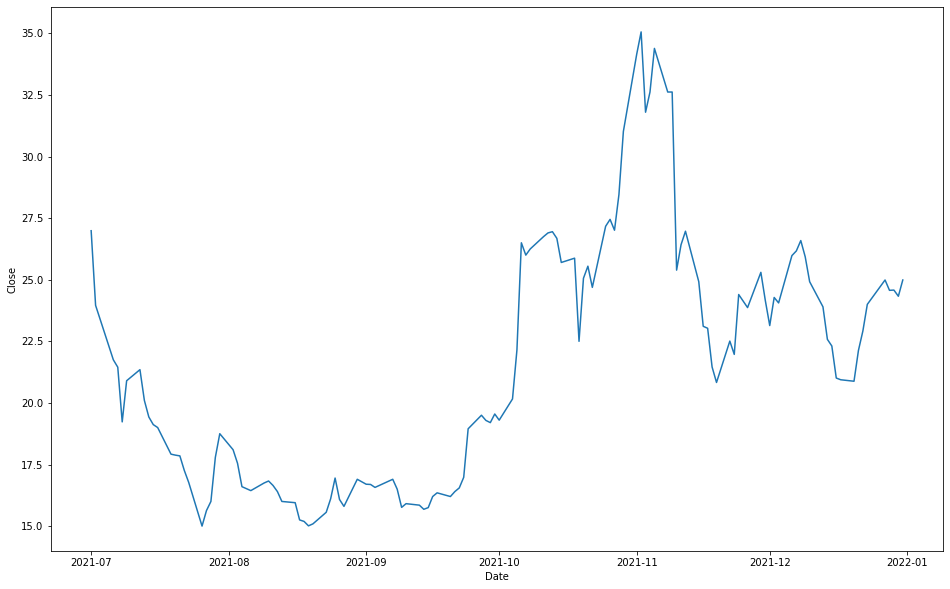

In [50]:
#Examine the df
##print(df.head())
##print(df.shape)

#change date formatting - date for x label redaing
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
print(df.head())
df.index = df['Date']
plt.figure(figsize=(16,10))
plt.plot(df['Close'], label='Close Price history')
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()

In [58]:
# data = df.sort_index(ascending=True, axis=0)
# new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
# for i in range(0,len(data)):
#     new_data['Date'][i] = data['Date'][i]
#     new_data['Close'][i] = data['Close'][i]
# new_data.index = new_data.Date
# new_data.drop('Date', axis=1, inplace=True)
# data_set = new_data.values
# print(data_set)

[[26.99]
 [23.959999]
 [21.75]
 [21.450001]
 [19.23]
 [20.9]
 [21.35]
 [20.1]
 [19.43]
 [19.120001000000002]
 [19.0]
 [17.92]
 [17.879998999999998]
 [17.85]
 [17.26]
 [16.77]
 [15.0]
 [15.63]
 [16.0]
 [17.790001]
 [18.75]
 [18.1]
 [17.549999]
 [16.6]
 [16.52]
 [16.440001000000002]
 [16.75]
 [16.83]
 [16.65]
 [16.4]
 [16.0]
 [15.95]
 [15.25]
 [15.19]
 [15.01]
 [15.09]
 [15.56]
 [16.110001]
 [16.950001]
 [16.08]
 [15.8]
 [16.9]
 [16.799999]
 [16.700001]
 [16.690001000000002]
 [16.57]
 [16.9]
 [16.5]
 [15.76]
 [15.91]
 [15.85]
 [15.682]
 [15.75]
 [16.200001]
 [16.35]
 [16.200001]
 [16.4]
 [16.549999]
 [16.98]
 [18.950001]
 [19.5]
 [19.290001]
 [19.200001]
 [19.549999]
 [19.299999]
 [20.16]
 [22.15]
 [26.5]
 [26.0]
 [26.25]
 [26.75]
 [26.9]
 [26.950001]
 [26.68]
 [25.701]
 [25.875]
 [22.5]
 [25.059998999999998]
 [25.549999]
 [24.690001000000002]
 [27.17]
 [27.450001]
 [27.01]
 [28.459999]
 [31.02]
 [34.150002]
 [35.060001]
 [31.799999]
 [32.619999]
 [34.389998999999996]
 [32.619999]
 [32.6

In [205]:
#Prepare and transform data for training and test by creating targets and labels
data = df.sort_index(ascending=True, axis=0)
new_data  = data[['Date','Close']]
new_data.drop('Date', axis=1,inplace=True)   
#print(new_data)
data_set = new_data.values
print(data_set.shape[0])
#train_size = int(data_set.shape[0] * 0.8)
#print(train_size)
train = data_set[0:train_size,:]
valid = data_set[train_size:,:]

#print(train.shape)
#print(valid.shape)

# Creating a data structure with 60 time-steps and 1 outpu

##########Created samples and Targets
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data_set)
#print(scaled_data)
#print(scaled_data[1,0])


#using timesteps of 60  
X_train, y_train = [], []
for i in range(60,len(train)):
    X_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

128


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [206]:
#Created the smaples and target labels # adjust the training shape
print(X_train)
print(y_train)
print(X_train.shape)
print(y_train.shape)


[[[0.59770685]
  [0.44665995]
  [0.33649051]
  ...
  [0.07726814]
  [0.09870388]
  [0.19690931]]

 [[0.44665995]
  [0.33649051]
  [0.32153543]
  ...
  [0.09870388]
  [0.19690931]
  [0.22432701]]

 [[0.33649051]
  [0.32153543]
  [0.21086739]
  ...
  [0.19690931]
  [0.22432701]
  [0.21385846]]

 ...

 [[0.05383848]
  [0.03988036]
  [0.09471585]
  ...
  [0.40428717]
  [0.40029913]
  [0.32203383]]

 [[0.03988036]
  [0.09471585]
  [0.08973075]
  ...
  [0.40029913]
  [0.32203383]
  [0.2906281 ]]

 [[0.09471585]
  [0.08973075]
  [0.08474581]
  ...
  [0.32203383]
  [0.2906281 ]
  [0.37437685]]]
[0.22432701 0.21385846 0.20937192 0.22681948 0.21435687 0.2572283
 0.35643069 0.57328013 0.54835491 0.56081752 0.58574274 0.59322031
 0.59571288 0.58225321 0.53344962 0.5421236  0.37387835 0.50149544
 0.52592216 0.48305087 0.60667993 0.6206381  0.59870386 0.67098696
 0.79860415 0.95463614 1.         0.83748745 0.87836481 0.9666001
 0.87836481 0.87836481 0.51794609 0.5692921  0.59670979 0.49451643
 0.404

In [207]:
#Create the model with LSTM
model = Sequential()

model.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60, return_sequences = True))
model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 60))


#add linear functila RELU activation function
model.add(Dense(8, activation='relu'))


# Adding the output layer
model.add(Dense(units = 1))


# #Adding the first LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True, input_shape = (X.shape[1], 1)))
# model.add(Dropout(0.2))
# # Adding a second LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# #model.add(Dropout(0.2))
# # Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# # Adding the output layer
# model.add(Dense(units = 1))
# #add linear functila RELU activation function
# #model.add(Dense(8, activation='relu'))

# #output layer
# model.add(Dense(units = 1))

In [208]:
# Model refi after hypertuning
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
2/2 [==============================] - 0s 57ms/step - loss: 0.3464 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.3278 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 39ms/step - loss: 0.3115 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 39ms/step - loss: 0.2815 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 39ms/step - loss: 0.2279 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 39ms/step - loss: 0.1435 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0586 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0470 - accuracy: 0.0238
Epoch 9/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0625 - accuracy: 0.0238
Epoch 10/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0624 - accuracy

2/2 [==============================] - 0s 41ms/step - loss: 0.0392 - accuracy: 0.0238
Epoch 84/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0398 - accuracy: 0.0238
Epoch 85/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0357 - accuracy: 0.0238
Epoch 86/100
2/2 [==============================] - 0s 48ms/step - loss: 0.0360 - accuracy: 0.0238
Epoch 87/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0352 - accuracy: 0.0238
Epoch 88/100
2/2 [==============================] - 0s 41ms/step - loss: 0.0361 - accuracy: 0.0238
Epoch 89/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0344 - accuracy: 0.0238
Epoch 90/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0361 - accuracy: 0.0238
Epoch 91/100
2/2 [==============================] - 0s 39ms/step - loss: 0.0368 - accuracy: 0.0238
Epoch 92/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0320 - accuracy: 0.0238
Epoch 93/100
2/2 [=====

In [209]:
#begin to predict values
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)


X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X.shape)

(68, 60)


In [210]:
y_test = model.predict(X_test)
y_test = scaler.inverse_transform(y_test)

In [211]:
y_test

array([[20.300035],
       [20.135132],
       [20.02284 ],
       [19.947594],
       [19.899384],
       [19.87193 ],
       [19.862865],
       [19.871548],
       [19.900013],
       [19.951914],
       [20.034262],
       [20.155104],
       [20.321846],
       [20.550362],
       [20.87464 ],
       [21.362732],
       [22.126978],
       [23.101854],
       [23.901794],
       [24.574512],
       [25.178125],
       [25.699728],
       [26.112898],
       [26.48427 ],
       [26.731092],
       [26.77014 ]], dtype=float32)

<ipython-input-219-7f58c2be0a94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = y_test


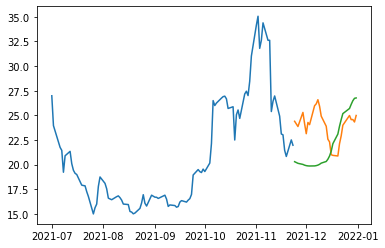

In [219]:
train = new_data[:train_size]
valid = new_data[train_size:]
valid['Predictions'] = y_test
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])

In [222]:
#Here are the tables used now
print(train.head()) # stores initial traing data starting
print(valid.head()) # stores both preidtced and actual 


#so what is happening here - we are predicting expected trends as opposed to what actually ahppened in the market and can extend this to an algorithm

#https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/

                Close
Date                 
2021-07-01  26.990000
2021-07-02  23.959999
2021-07-06  21.750000
2021-07-07  21.450001
2021-07-08  19.230000
                Close  Predictions
Date                              
2021-11-24  24.400000    20.300035
2021-11-26  23.870001    20.135132
2021-11-29  25.299999    20.022840
2021-11-30  24.160000    19.947594
2021-12-01  23.139999    19.899384
